#1.Make Train, Test data

In [ ]:
import pandas as pd
import os

In [ ]:
test_percentage = 0.2

In [ ]:
# Train Csv
from google.colab import files
files.upload()

Saving Train.csv to Train.csv


{'Train.csv': b'Width,Height,Roi.X1,Roi.Y1,Roi.X2,Roi.Y2,ClassId,Path\n27,26,5,5,22,20,20,Train/20/00020_00000_00000.png\n28,27,5,6,23,22,20,Train/20/00020_00000_00001.png\n29,26,6,5,24,21,20,Train/20/00020_00000_00002.png\n28,27,5,6,23,22,20,Train/20/00020_00000_00003.png\n28,26,5,5,23,21,20,Train/20/00020_00000_00004.png\n31,27,6,5,26,22,20,Train/20/00020_00000_00005.png\n31,28,6,6,26,23,20,Train/20/00020_00000_00006.png\n31,28,6,6,26,23,20,Train/20/00020_00000_00007.png\n31,29,5,6,26,24,20,Train/20/00020_00000_00008.png\n34,32,6,6,29,26,20,Train/20/00020_00000_00009.png\n36,33,5,6,31,28,20,Train/20/00020_00000_00010.png\n37,34,5,6,32,29,20,Train/20/00020_00000_00011.png\n38,34,5,6,32,29,20,Train/20/00020_00000_00012.png\n40,34,6,6,34,29,20,Train/20/00020_00000_00013.png\n39,34,5,5,34,29,20,Train/20/00020_00000_00014.png\n42,36,6,5,37,31,20,Train/20/00020_00000_00015.png\n45,39,6,5,40,34,20,Train/20/00020_00000_00016.png\n47,42,5,5,41,36,20,Train/20/00020_00000_00017.png\n50,45,5,5,4

In [ ]:
annotation = pd.read_csv('/content/Train.csv')

In [ ]:
annotation.head()

Width  Height  Roi.X1  Roi.Y1  Roi.X2  Roi.Y2  ClassId  \
0     27      26       5       5      22      20       20   
1     28      27       5       6      23      22       20   
2     29      26       6       5      24      21       20   
3     28      27       5       6      23      22       20   
4     28      26       5       5      23      21       20   

                             Path  
0  Train/20/00020_00000_00000.png  
1  Train/20/00020_00000_00001.png  
2  Train/20/00020_00000_00002.png  
3  Train/20/00020_00000_00003.png  
4  Train/20/00020_00000_00004.png

In [ ]:
Prohibitory = [0, 1, 2, 3, 4, 5, 7, 8, 10, 15, 16]
Danger = [11, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31]
Mandatory = [33, 34, 35, 36, 37, 38, 39, 40]
Other = [6, 12, 13, 14, 17, 32, 41, 42]

categories = ['Prohibitory' ,'Danger', 'Mandatory','Other']

In [ ]:
annotation['CategoryId'] = 0

In [ ]:
annotation.loc[annotation['ClassId'].isin(Prohibitory), 'CategoryId'] = 0
annotation.loc[annotation['ClassId'].isin(Danger), 'CategoryId'] = 1
annotation.loc[annotation['ClassId'].isin(Mandatory), 'CategoryId'] = 2
annotation.loc[annotation['ClassId'].isin(Other), 'CategoryId'] = 3

In [ ]:
annotation['CategoryId'].value_counts()

0    17310
1     8970
3     7290
2     5639
Name: CategoryId, dtype: int64

In [ ]:
annotation['centerX'] = (annotation['Roi.X2'] + annotation['Roi.X1']) / 2 / annotation['Width']

In [ ]:
annotation['centerY'] = (annotation['Roi.Y2'] + annotation['Roi.Y1']) / 2 / annotation['Height']

In [ ]:
annotation['width'] = (annotation['Roi.X2'] - annotation['Roi.X1']) / annotation['Width']

In [ ]:
annotation['height'] = (annotation['Roi.Y2'] - annotation['Roi.Y1']) / annotation['Height']

In [ ]:
annotation.head()

Width  Height  Roi.X1  Roi.Y1  Roi.X2  Roi.Y2  ClassId  \
0     27      26       5       5      22      20       20   
1     28      27       5       6      23      22       20   
2     29      26       6       5      24      21       20   
3     28      27       5       6      23      22       20   
4     28      26       5       5      23      21       20   

                             Path  CategoryId   centerX   centerY     width  \
0  Train/20/00020_00000_00000.png           1  0.500000  0.480769  0.629630   
1  Train/20/00020_00000_00001.png           1  0.500000  0.518519  0.642857   
2  Train/20/00020_00000_00002.png           1  0.517241  0.500000  0.620690   
3  Train/20/00020_00000_00003.png           1  0.500000  0.518519  0.642857   
4  Train/20/00020_00000_00004.png           1  0.500000  0.500000  0.642857   

     height  
0  0.576923  
1  0.592593  
2  0.615385  
3  0.592593  
4  0.615385

In [ ]:
annotation = annotation.drop(columns = ['Width', 'Height', 'Roi.X1', 'Roi.X2', 'Roi.Y1', 'Roi.Y2', 'ClassId'], axis = 'columns')

In [ ]:
annotation.head()

Path  CategoryId   centerX   centerY     width  \
0  Train/20/00020_00000_00000.png           1  0.500000  0.480769  0.629630   
1  Train/20/00020_00000_00001.png           1  0.500000  0.518519  0.642857   
2  Train/20/00020_00000_00002.png           1  0.517241  0.500000  0.620690   
3  Train/20/00020_00000_00003.png           1  0.500000  0.518519  0.642857   
4  Train/20/00020_00000_00004.png           1  0.500000  0.500000  0.642857   

     height  
0  0.576923  
1  0.592593  
2  0.615385  
3  0.592593  
4  0.615385

In [ ]:
for index, data in annotation.iterrows():
  print(index, data['Path'])

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
34209 Train/35/00035_00000_00010.png
34210 Train/35/00035_00000_00011.png
34211 Train/35/00035_00000_00012.png
34212 Train/35/00035_00000_00013.png
34213 Train/35/00035_00000_00014.png
34214 Train/35/00035_00000_00015.png
34215 Train/35/00035_00000_00016.png
34216 Train/35/00035_00000_00017.png
34217 Train/35/00035_00000_00018.png
34218 Train/35/00035_00000_00019.png
34219 Train/35/00035_00000_00020.png
34220 Train/35/00035_00000_00021.png
34221 Train/35/00035_00000_00022.png
34222 Train/35/00035_00000_00023.png
34223 Train/35/00035_00000_00024.png
34224 Train/35/00035_00000_00025.png
34225 Train/35/00035_00000_00026.png
34226 Train/35/00035_00000_00027.png
34227 Train/35/00035_00000_00028.png
34228 Train/35/00035_00000_00029.png
34229 Train/35/00035_00001_00000.png
34230 Train/35/00035_00001_00001.png
34231 Train/35/00035_00001_00002.png
34232 Train/35/00035_00001_00003.png
34233 Train/35/00035_00001_00004.png
34234 Train/35/00035_00001_00005.png
34

In [ ]:
with open('classes.names', 'w') as names:
  for category in categories:
    line = category + '\n'
    names.write(line)
  print('[classes.names] is created')

[classes.names] is created


In [ ]:
with open('traffic.data', 'w') as data:
    data.write('classes = ' + '/content/' + str(len(categories)) + '\n')
    data.write('train = ' + '/content/' + 'train.txt' + '\n')
    data.write('valid = ' + '/content/' + 'test.txt' + '\n')
    data.write('names = ' + '/content/' + 'classes.names' + '\n')
    data.write('backup = backup')
    print('[custom_data.data] is created')

[custom_data.data] is created


In [ ]:
!cp -r /content/drive/MyDrive/Fastcampus_OpenCV/darknet/Train.zip .

In [ ]:
!unzip Train.zip

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
 extracting: Train/5/00005_00053_00014.png  
 extracting: Train/5/00005_00053_00015.png  
 extracting: Train/5/00005_00053_00016.png  
 extracting: Train/5/00005_00053_00017.png  
 extracting: Train/5/00005_00053_00018.png  
 extracting: Train/5/00005_00053_00019.png  
 extracting: Train/5/00005_00053_00020.png  
 extracting: Train/5/00005_00053_00021.png  
 extracting: Train/5/00005_00053_00022.png  
 extracting: Train/5/00005_00053_00023.png  
 extracting: Train/5/00005_00053_00024.png  
 extracting: Train/5/00005_00053_00025.png  
 extracting: Train/5/00005_00053_00026.png  
 extracting: Train/5/00005_00053_00027.png  
 extracting: Train/5/00005_00053_00028.png  
  inflating: Train/5/00005_00053_00029.png  
 extracting: Train/5/00005_00054_00000.png  
 extracting: Train/5/00005_00054_00001.png  
 extracting: Train/5/00005_00054_00002.png  
 extracting: Train/5/00005_00054_00003.png  
 extracting: Train/5/00005_00054_00004.png  
 extracting: Train/

In [ ]:
paths = []
for index, data in annotation.iterrows():
  #print(index, data['Path'][:-4])
  txt_file = '/content/' + data['Path'][:-4] + '.txt'
  line = str(data['CategoryId']) + ' ' + str(data['centerX']) + ' ' + str(data['centerY']) + ' ' + str(data['width']) + ' ' + str(data['height']) + '\n'
  with open(txt_file, 'w') as txt:
    txt.write(line)
  image_path = '/content/' + data['Path'] + '\n'
  paths.append(image_path)
  print(index, txt_file, line)

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
36709 /content/Train/38/00038_00023_00020.txt 2 0.5094339622641509 0.5 0.7924528301886793 0.8113207547169812

36710 /content/Train/38/00038_00023_00021.txt 2 0.5 0.5 0.7857142857142857 0.8181818181818182

36711 /content/Train/38/00038_00023_00022.txt 2 0.5 0.5 0.8032786885245902 0.8333333333333334

36712 /content/Train/38/00038_00023_00023.txt 2 0.5 0.4921875 0.8125 0.828125

36713 /content/Train/38/00038_00023_00024.txt 2 0.49264705882352944 0.5 0.8088235294117647 0.8260869565217391

36714 /content/Train/38/00038_00023_00025.txt 2 0.5066666666666667 0.5066666666666667 0.8266666666666667 0.8266666666666667

36715 /content/Train/38/00038_00023_00026.txt 2 0.5059523809523809 0.5058823529411764 0.8214285714285714 0.8235294117647058

36716 /content/Train/38/00038_00023_00027.txt 2 0.5 0.5 0.8333333333333334 0.8367346938775511

36717 /content/Train/38/00038_00023_00028.txt 2 0.5 0.5044642857142857 0.8333333333333334 0.8303571428571429

36718 /content/Trai

In [ ]:
paths[:3]

['/content/Train/20/00020_00000_00000.png\n',
 '/content/Train/20/00020_00000_00001.png\n',
 '/content/Train/20/00020_00000_00002.png\n']

In [ ]:
num_test = int(len(paths) * test_percentage)
print(num_test)

7841


In [ ]:
paths_test = paths[:num_test]
paths_train = paths[num_test:]

In [ ]:
with open('train.txt', 'w') as train_txt:
    for path in paths_train:
        train_txt.write(path)
    print('[train.txt] is created')

[train.txt] is created


In [ ]:
with open('test.txt', 'w') as test_txt:
    for path in paths_test:
        test_txt.write(path)
    print('[test.txt] is created')

[test.txt] is created


# 2.Darknet

In [ ]:
# clone darknet repo
!git clone https://github.com/AlexeyAB/darknet

Cloning into 'darknet'...
remote: Enumerating objects: 15833, done.
remote: Counting objects: 100% (294/294), done.
remote: Compressing objects: 100% (152/152), done.
remote: Total 15833 (delta 157), reused 219 (delta 140), pack-reused 15539
Receiving objects: 100% (15833/15833), 14.76 MiB | 10.30 MiB/s, done.
Resolving deltas: 100% (10587/10587), done.


In [ ]:
# change makefile to have GPU and OPENCV enabled
%cd darknet
!sed -i 's/OPENCV=0/OPENCV=1/' Makefile
!sed -i 's/GPU=0/GPU=1/' Makefile
!sed -i 's/CUDNN=0/CUDNN=1/' Makefile

/content/darknet


In [ ]:
# make darknet (build)
!make

mkdir -p ./obj/
mkdir -p backup
mkdir -p results
chmod +x *.sh
g++ -std=c++11 -std=c++11 -Iinclude/ -I3rdparty/stb/include -DOPENCV `pkg-config --cflags opencv4 2> /dev/null || pkg-config --cflags opencv` -DGPU -I/usr/local/cuda/include/ -DCUDNN -Wall -Wfatal-errors -Wno-unused-result -Wno-unknown-pragmas -fPIC -rdynamic -Ofast -DOPENCV -DGPU -DCUDNN -I/usr/local/cudnn/include -c ./src/image_opencv.cpp -o obj/image_opencv.o
./src/image_opencv.cpp: In function ‘void draw_detections_cv_v3(void**, detection*, int, float, char**, image**, int, int)’:
./src/image_opencv.cpp:945:23: warning: variable ‘rgb’ set but not used []8;;https://gcc.gnu.org/onlinedocs/gcc/Warning-Options.html#index-Wunused-but-set-variable-Wunused-but-set-variable]8;;]
  945 |                 float rgb[3];
      |                       ^~~
./src/image_opencv.cpp: In function ‘void cv_draw_object(image, float*, int, int, int*, float*, int*, int, char**)’:
./src/image_opencv.cpp:1443:14: warning: unused variable ‘bu

In [ ]:
# get yolov3 pretrained coco dataset weights
!wget https://pjreddie.com/media/files/yolov3.weights

--2023-11-17 20:28:57--  https://pjreddie.com/media/files/yolov3.weights
Resolving pjreddie.com (pjreddie.com)... 128.208.4.108
Connecting to pjreddie.com (pjreddie.com)|128.208.4.108|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 248007048 (237M) [application/octet-stream]
Saving to: ‘yolov3.weights’

yolov3.weights      100%[===================>] 236.52M  16.9MB/s    in 15s     

2023-11-17 20:29:13 (15.8 MB/s) - ‘yolov3.weights’ saved [248007048/248007048]



In [ ]:
# define helper functions
def imShow(path):
  import cv2
  import matplotlib.pyplot as plt
  %matplotlib inline

  image = cv2.imread(path)
  height, width = image.shape[:2]
  resized_image = cv2.resize(image,(3*width, 3*height), interpolation = cv2.INTER_CUBIC)

  fig = plt.gcf()
  fig.set_size_inches(18, 10)
  plt.axis("off")
  plt.imshow(cv2.cvtColor(resized_image, cv2.COLOR_BGR2RGB))
  plt.show()

# use this to upload files
def upload():
  from google.colab import files
  uploaded = files.upload()
  for name, data in uploaded.items():
    with open(name, 'wb') as f:
      f.write(data)
      print ('saved file', name)

# use this to download a file
def download(path):
  from google.colab import files
  files.download(path)

 CUDA-version: 11080 (12000), cuDNN: 8.9.6, GPU count: 1  
 OpenCV version: 4.5.4
 0 : compute_capability = 750, cudnn_half = 0, GPU: Tesla T4 
net.optimized_memory = 0 
mini_batch = 1, batch = 1, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 Create CUDA-stream - 0 
 Create cudnn-handle 0 
conv     32       3 x 3/ 1    416 x 416 x   3 ->  416 x 416 x  32 0.299 BF
   1 conv     64       3 x 3/ 2    416 x 416 x  32 ->  208 x 208 x  64 1.595 BF
   2 conv     32       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  32 0.177 BF
   3 conv     64       3 x 3/ 1    208 x 208 x  32 ->  208 x 208 x  64 1.595 BF
   4 Shortcut Layer: 1,  wt = 0, wn = 0, outputs: 208 x 208 x  64 0.003 BF
   5 conv    128       3 x 3/ 2    208 x 208 x  64 ->  104 x 104 x 128 1.595 BF
   6 conv     64       1 x 1/ 1    104 x 104 x 128 ->  104 x 104 x  64 0.177 BF
   7 conv    128       3 x 3/ 1    104 x 104 x  64 ->  104 x 104 x 128 1.595 BF
   8 Shortcut Layer: 5,  

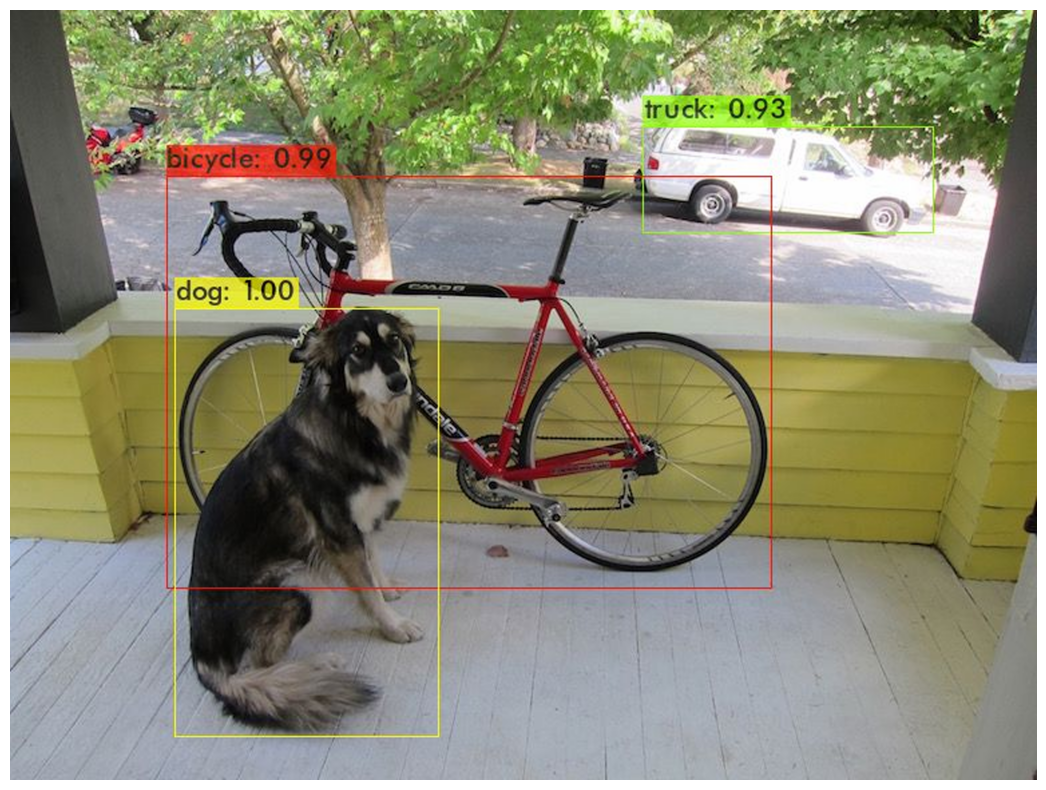

In [ ]:
# look we can run another detection!
!./darknet detect cfg/yolov3.cfg yolov3.weights data/dog.jpg
imShow('predictions.jpg')

In [ ]:
# Download Pretrained Convolutional Weights
!wget https://pjreddie.com/media/files/darknet53.conv.74

--2023-11-17 20:29:31--  https://pjreddie.com/media/files/darknet53.conv.74
Resolving pjreddie.com (pjreddie.com)... 128.208.4.108
Connecting to pjreddie.com (pjreddie.com)|128.208.4.108|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 162482580 (155M) [application/octet-stream]
Saving to: ‘darknet53.conv.74’

darknet53.conv.74   100%[===================>] 154.96M  21.7MB/s    in 8.3s    

2023-11-17 20:29:40 (18.7 MB/s) - ‘darknet53.conv.74’ saved [162482580/162482580]



#3.Train Model

In [ ]:
# 11Hours
# Train The Model
!./darknet detector train /content/traffic.data /content/drive/MyDrive/Fastcampus_OpenCV/darknet/cfg/traffic-train-yolo.cfg /content/darknet/darknet53.conv.74 -dont_show

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
 total_bbox = 506520, rewritten_bbox = 0.000000 % 
7926/8000: loss=0.0 hours left=0.3
 7926: 0.040128, 0.034873 avg loss, 0.000010 rate, 8.212447 seconds, 507264 images, 0.254863 hours left
Loaded: 0.000068 seconds
v3 (mse loss, Normalizer: (iou: 0.75, obj: 1.00, cls: 1.00) Region 82 Avg (IOU: 0.905443), count: 4, class_loss = 0.224681, iou_loss = 0.060053, total_loss = 0.284735 
v3 (mse loss, Normalizer: (iou: 0.75, obj: 1.00, cls: 1.00) Region 94 Avg (IOU: 0.000000), count: 1, class_loss = 0.000000, iou_loss = 0.000000, total_loss = 0.000000 
v3 (mse loss, Normalizer: (iou: 0.75, obj: 1.00, cls: 1.00) Region 106 Avg (IOU: 0.000000), count: 1, class_loss = 0.000000, iou_loss = 0.000000, total_loss = 0.000000 
 total_bbox = 506524, rewritten_bbox = 0.000000 % 
v3 (mse loss, Normalizer: (iou: 0.75, obj: 1.00, cls: 1.00) Region 82 Avg (IOU: 0.876238), count: 4, class_loss = 0.000014, iou_loss = 0.138680, total_loss = 0.138694 
v3 (mse loss, Normalizer

In [ ]:
!cp -r /content/darknet /content/drive/MyDrive

# 4.Test Model

## 4.1 png

In [ ]:
!cp -r /content/drive/MyDrive/Fastcampus_OpenCV/darknet/trafficsign/ .

In [ ]:
!ls -al /content/drive/MyDrive/Fastcampus_OpenCV/darknet/trafficsign

total 535198
-rw------- 1 root root        35 Nov 18 05:36 classes.names
drwx------ 2 root root      4096 Nov 17 10:17 Meta
drwx------ 2 root root      4096 Nov 17 10:17 Test
-rw------- 1 root root    427897 Nov 15 14:04 Test.csv
-rw------- 1 root root    306159 Nov 18 05:36 test.txt
-rw------- 1 root root       855 Jun 18  2021 traffic-classes.names
-rw------- 1 root root 247210068 Jun 18  2021 traffic-classes-train-yolo_final.weights
-rw------- 1 root root  52452430 Jun 18  2021 traffic-sign-video.avi
-rw------- 1 root root      8328 Jun 18  2021 traffic-sign-yolo.cfg
-rw------- 1 root root      8328 Nov 17 10:14 traffic-train-yolo.cfg
-rw------- 1 root root 246370008 Nov 17 10:14 traffic-train-yolo_final.weights
-rw------- 1 root root   1247531 Nov 18 05:36 train.txt


In [ ]:
weight_file = '/content/drive/MyDrive/Fastcampus_OpenCV/darknet/trafficsign/traffic-train-yolo_final.weights'
cfg_file = '/content/drive/MyDrive/Fastcampus_OpenCV/darknet/trafficsign/traffic-sign-yolo.cfg'
name_file = '/content/drive/MyDrive/Fastcampus_OpenCV/darknet/trafficsign/classes.names'

min_confidence = 0.5

In [ ]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow
import IPython
import time

In [ ]:
# Yolo 모델 로드
net = cv2.dnn.readNet(weight_file, cfg_file)

# 출력 레이어 이름 얻기
layer_names = net.getLayerNames()
output_layers_indices = net.getUnconnectedOutLayers()
output_layers = [layer_names[i - 1] for i in output_layers_indices]

In [ ]:
classes = []
with open(name_file, 'r') as f:
    classes = [line.strip() for line in f.readlines()]
print(classes)

['Prohibitory', 'Danger', 'Mandatory', 'Other']


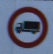

54 53


In [ ]:
file_name = '/content/drive/MyDrive/Fastcampus_OpenCV/darknet/trafficsign/Test/00000.png'
img = cv2.imread(file_name)
height, width, channel = img.shape
cv2_imshow(img)
print(height, width)

0 Prohibitory


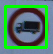

In [ ]:
# Detecting objects
# https://docs.opencv.org/master/d6/d0f/group__dnn.html
blob = cv2.dnn.blobFromImage(img, 0.00392, (416, 416), (0, 0, 0), True, crop=False)

net.setInput(blob)
outs = net.forward(output_layers)

class_ids = []
confidences = []
boxes = []

for out in outs:
    for detection in out:
        scores = detection[5:]
        class_id = np.argmax(scores)
        confidence = scores[class_id]
        if confidence > min_confidence:
            # Object detected
            center_x = int(detection[0] * width)
            center_y = int(detection[1] * height)
            w = int(detection[2] * width)
            h = int(detection[3] * height)

            # Rectangle coordinates
            x = int(center_x - w / 2)
            y = int(center_y - h / 2)

            boxes.append([x, y, w, h])
            confidences.append(float(confidence))
            class_ids.append(class_id)

indexes = cv2.dnn.NMSBoxes(boxes, confidences, min_confidence, 0.4)
font = cv2.FONT_HERSHEY_COMPLEX
for i in range(len(boxes)):
    if i in indexes:
        x, y, w, h = boxes[i]
        label = str(classes[class_ids[i]])
        print(class_ids[i], label)
        cv2.rectangle(img, (x, y), (x + w, y + h), (0, 255, 0), 2)
        cv2.putText(img, label, (x, y - 10), font, 0.5, (0, 255, 0), 1)

cv2_imshow(img)

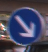

52 48


In [ ]:
file_name = '/content/drive/MyDrive/Fastcampus_OpenCV/darknet/trafficsign/Test/00002.png'
img = cv2.imread(file_name)
height, width, channel = img.shape
cv2_imshow(img)
print(height, width)

2 Mandatory


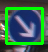

In [ ]:
blob = cv2.dnn.blobFromImage(img, 0.00392, (416, 416), (0, 0, 0), True, crop=False)

net.setInput(blob)
outs = net.forward(output_layers)

class_ids = []
confidences = []
boxes = []

for out in outs:
    for detection in out:
        scores = detection[5:]
        class_id = np.argmax(scores)
        confidence = scores[class_id]
        if confidence > min_confidence:
            # Object detected
            center_x = int(detection[0] * width)
            center_y = int(detection[1] * height)
            w = int(detection[2] * width)
            h = int(detection[3] * height)

            # Rectangle coordinates
            x = int(center_x - w / 2)
            y = int(center_y - h / 2)

            boxes.append([x, y, w, h])
            confidences.append(float(confidence))
            class_ids.append(class_id)

indexes = cv2.dnn.NMSBoxes(boxes, confidences, min_confidence, 0.4)
font = cv2.FONT_HERSHEY_COMPLEX
for i in range(len(boxes)):
    if i in indexes:
        x, y, w, h = boxes[i]
        label = str(classes[class_ids[i]])
        print(class_ids[i], label)
        cv2.rectangle(img, (x, y), (x + w, y + h), (0, 255, 0), 2)
        cv2.putText(img, label, (x, y - 10), font, 0.5, (0, 255, 0), 1)

cv2_imshow(img)

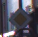

37 38


In [ ]:
file_name = '/content/drive/MyDrive/Fastcampus_OpenCV/darknet/trafficsign/Test/00010.png'
img = cv2.imread(file_name)
height, width, channel = img.shape
cv2_imshow(img)
print(height, width)

3 Other


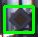

In [ ]:
blob = cv2.dnn.blobFromImage(img, 0.00392, (416, 416), (0, 0, 0), True, crop=False)

net.setInput(blob)
outs = net.forward(output_layers)

class_ids = []
confidences = []
boxes = []

for out in outs:
    for detection in out:
        scores = detection[5:]
        class_id = np.argmax(scores)
        confidence = scores[class_id]
        if confidence > min_confidence:
            # Object detected
            center_x = int(detection[0] * width)
            center_y = int(detection[1] * height)
            w = int(detection[2] * width)
            h = int(detection[3] * height)

            # Rectangle coordinates
            x = int(center_x - w / 2)
            y = int(center_y - h / 2)

            boxes.append([x, y, w, h])
            confidences.append(float(confidence))
            class_ids.append(class_id)

indexes = cv2.dnn.NMSBoxes(boxes, confidences, min_confidence, 0.4)
font = cv2.FONT_HERSHEY_COMPLEX
for i in range(len(boxes)):
    if i in indexes:
        x, y, w, h = boxes[i]
        label = str(classes[class_ids[i]])
        print(class_ids[i], label)
        cv2.rectangle(img, (x, y), (x + w, y + h), (0, 255, 0), 2)
        cv2.putText(img, label, (x, y - 10), font, 0.5, (0, 255, 0), 1)

cv2_imshow(img)

## 4.2 video

In [ ]:
frame_count = 0
writer = None
input_name = '/content/drive/MyDrive/Fastcampus_OpenCV/darknet/trafficsign/traffic-sign-video.mp4'
output_name = 'traffic-sign-video.avi'

In [ ]:
def writeFrame(img):
    # use global variable, writer
    global writer
    height, width = img.shape[:2]
    if writer is None and output_name is not None:
        fourcc = cv2.VideoWriter_fourcc(*'MJPG')
        writer = cv2.VideoWriter(output_name, fourcc, 24, (width, height), True)
    if writer is not None:
        writer.write(img)

def detectAndDisplay(frame):
    # use global variable, writer
    global frame_count
    frame_count += 1
    start_time = time.time()
    IPython.display.clear_output(wait=True)
    height, width, channedls = frame.shape
    # Detecting objects
    # https://docs.opencv.org/master/d6/d0f/group__dnn.html
    blob = cv2.dnn.blobFromImage(frame, 0.00392, (416, 416), (0, 0, 0), True, crop=False)

    net.setInput(blob)
    outs = net.forward(output_layers)

    class_ids = []
    confidences = []
    boxes = []

    for out in outs:
        for detection in out:
            scores = detection[5:]
            class_id = np.argmax(scores)
            confidence = scores[class_id]
            if confidence > min_confidence:
                # Object detected
                center_x = int(detection[0] * width)
                center_y = int(detection[1] * height)
                w = int(detection[2] * width)
                h = int(detection[3] * height)

                # Rectangle coordinates
                x = int(center_x - w / 2)
                y = int(center_y - h / 2)

                boxes.append([x, y, w, h])
                confidences.append(float(confidence))
                class_ids.append(class_id)

    indexes = cv2.dnn.NMSBoxes(boxes, confidences, min_confidence, 0.4)
    font = cv2.FONT_HERSHEY_COMPLEX
    for i in range(len(boxes)):
        if i in indexes:
            x, y, w, h = boxes[i]
            label = str(classes[class_ids[i]])
            print(class_ids[i], label)
            cv2.rectangle(frame, (x, y), (x + w, y + h), (0, 255, 0), 2)
            cv2.putText(frame, label, (x, y - 10), font, 0.5, (0, 255, 0), 1)

    frame_time = time.time() - start_time
    print("Frame {} time {}".format(frame_count, frame_time))
    cv2_imshow(frame)
    writeFrame(frame)

In [ ]:
#-- 2. Read the video stream
cap = cv2.VideoCapture(input_name)
if not cap.isOpened:
    print('--(!)Error opening video capture')
    exit(0)
while True:
    ret, frame = cap.read()
    if frame is None:
        print('--(!) No captured frame -- Break!')
        break
    detectAndDisplay(frame)

In [ ]:
from google.colab import files
files.download(output_name)